In [3]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

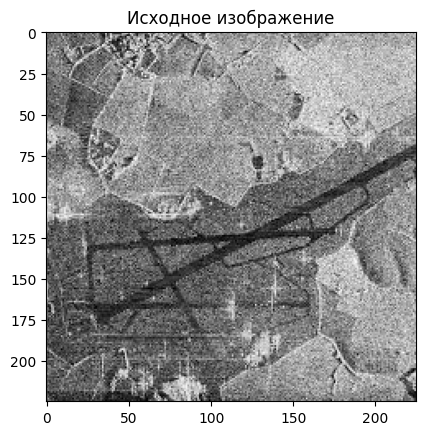

In [4]:
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.show()

In [6]:
bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

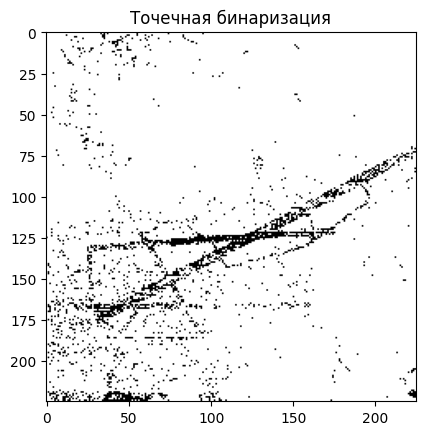

In [7]:
plt.imshow(bin_img, cmap="gray")
plt.title("Точечная бинаризация")
plt.show()

Длина максимального участка дороги: 248.29


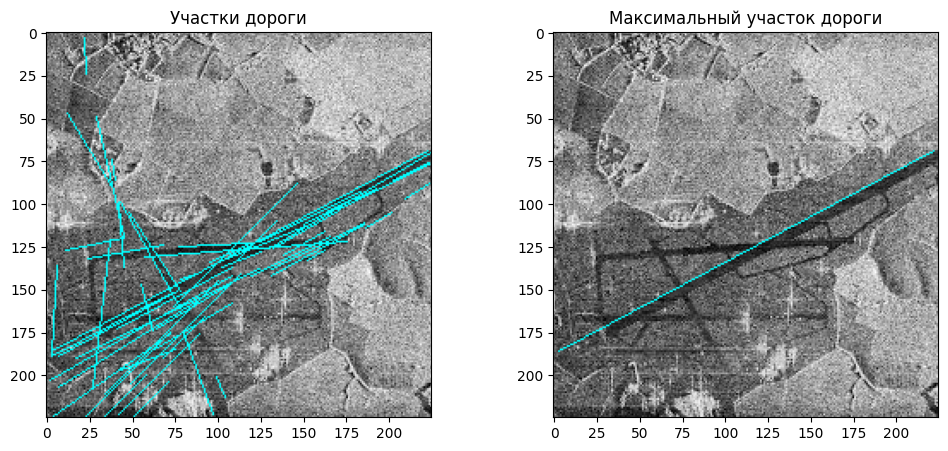

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Копируем оригинальное изображение для дальнейшей обработки
image_with_lines = image.copy()
image_max_line = image.copy()

# Применяем оператор Кэнни для обнаружения краев
edges = cv2.Canny(bin_img, 0, 1, apertureSize=3)

# Параметры для HoughLinesP
min_line_length = 10
max_line_gap = 8
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=min_line_length, maxLineGap=max_line_gap)

# Переменная для хранения максимальной длины линии
max_line_length = 0

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (255, 255, 0), 1)
        
        # Вычисляем длину линии
        line_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        
        # Проверяем, является ли текущая линия максимальной
        if line_length > max_line_length:
            max_line_length = line_length
            max_line_coords = (x1, y1, x2, y2)

    # Рисуем максимальную линию
    cv2.line(image_max_line, (max_line_coords[0], max_line_coords[1]), 
             (max_line_coords[2], max_line_coords[3]), (255, 255, 0), 1)
    
    print(f"Длина максимального участка дороги: {max_line_length:.2f}")
    
    # Отображаем результаты
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
    plt.title("Участки дороги")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_max_line, cv2.COLOR_BGR2RGB))
    plt.title("Максимальный участок дороги")

    plt.show()
else:
    print("Линии не обнаружены.")

In [20]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

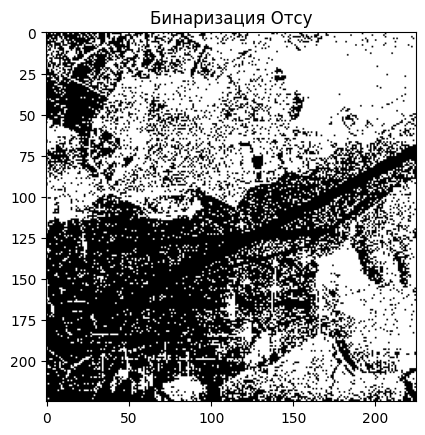

In [21]:
plt.imshow(th2, cmap = "gray")
plt.title("Бинаризация Отсу")
plt.show()

In [22]:
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,71,21)

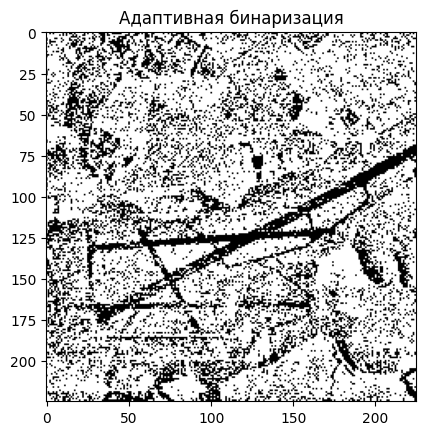

In [23]:
plt.imshow(th3, cmap = "gray")
plt.title("Адаптивная бинаризация")
plt.show()

In [25]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0.0)

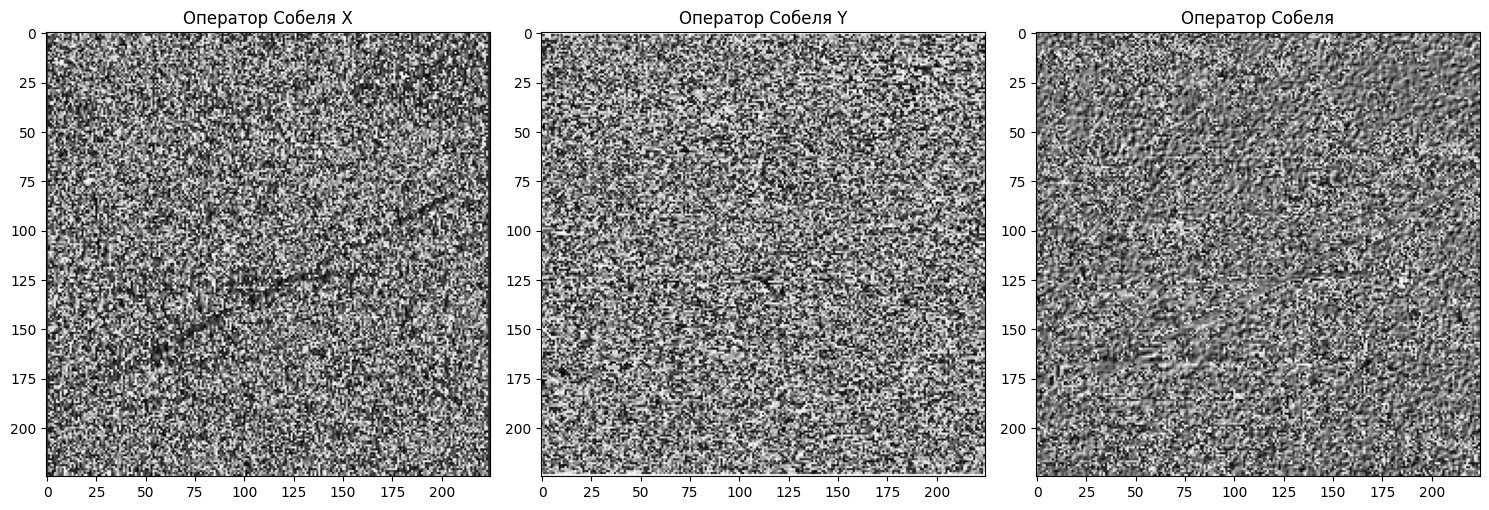

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow((grad_x - grad_x.min()) * 255, cmap="gray")
axs[0].set_title("Оператор Собеля X")
axs[1].imshow((grad_y - grad_y.min()) * 255, cmap="gray")
axs[1].set_title("Оператор Собеля Y")
axs[2].imshow((grad - grad.min()) * 255, cmap="gray")
axs[2].set_title("Оператор Собеля")
plt.tight_layout()
plt.show()

In [27]:
edges = cv2.Canny(image_gray,100,200)

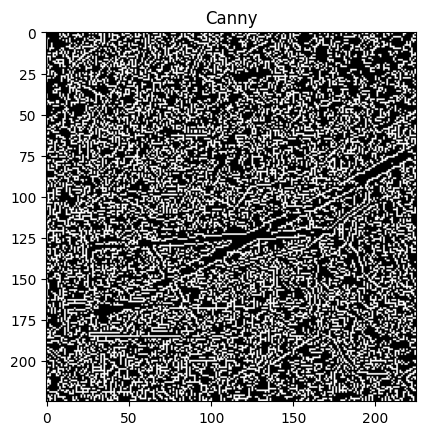

In [28]:
plt.imshow(edges, cmap="gray")
plt.title("Canny")
plt.show()

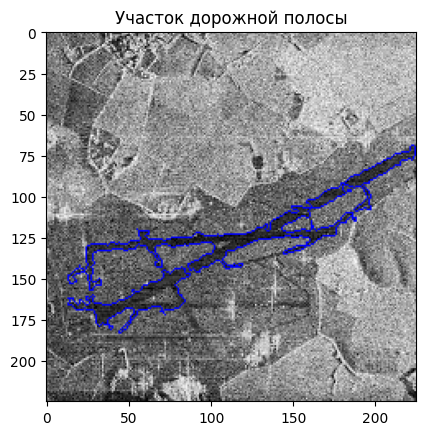

In [29]:
# Применяем гауссовское размытие к бинарному изображению
blurred_image = cv2.GaussianBlur(bin_img, (5, 5), 0)

# Применяем адаптивное пороговое значение
thresholded_image = cv2.adaptiveThreshold(
    blurred_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    55,
    2
)

# Находим контуры на изображении
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Копируем оригинальное изображение для отображения контуров
contour_image = image.copy()

# Проверяем, найдены ли контуры
if contours:
    for contour in contours:
        # Вычисляем площадь контура
        area = cv2.contourArea(contour)
        
        # Рисуем контур, если его площадь больше 500
        if area > 500:
            cv2.drawContours(contour_image, [contour], -1, (0, 0, 255), 1)

# Отображаем результат с контурами
plt.imshow(line_image, cmap="gray")
plt.title("Участок дорожной полосы")
plt.show()